In [9]:
import pandas as pd

In [42]:
df = pd.read_csv(r'C:\Users\ajayr\OneDrive\Desktop\datasets\imdb.csv',encoding='cp1252')

In [37]:
print(df)

                                                    cmd  score
0     A very, very, very slow-moving, aimless movie ...      0
1     Not sure who was more lost - the flat characte...      0
2     Attempting artiness with black & white and cle...      0
3          Very little music or anything to speak of.        0
4     The best scene in the movie was when Gerardo i...      1
...                                                 ...    ...
1491  I just got bored watching Jessice Lange take h...      0
1492  Unfortunately, any virtue in this film's produ...      0
1493                   In a word, it is embarrassing.        0
1494                               Exceptionally bad!        0
1495  All in all its an insult to one's intelligence...      0

[1496 rows x 2 columns]


In [12]:
df.head()

,cmd,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [40]:
df.tail()

,cmd,score
1491,I just got bored watching Jessice Lange take h...,0
1492,"Unfortunately, any virtue in this film's produ...",0
1493,"In a word, it is embarrassing.",0
1494,Exceptionally bad!,0
1495,All in all its an insult to one's intelligence...,0


In [39]:
df.groupby('score').count()

,cmd
score,
0,724
1,772


In [15]:
df.columns

Index(['cmd', 'score'], dtype='object')

In [16]:
data=df[['cmd','score']]

In [17]:
data['score'].unique()

array([0, 1], dtype=int64)

In [18]:
# Separating positive and negative reviews :
data_pos = data[data['score'] == 1]
data_neg = data[data['score'] == 0]

In [19]:
# Combining positive and negative reviews :
dataset = pd.concat([data_pos, data_neg])

In [20]:
print(dataset)

                                                    cmd  score
4     The best scene in the movie was when Gerardo i...      1
7     Saw the movie today and thought it was a good ...      1
9     Loved the casting of Jimmy Buffet as the scien...      1
10                 And those baby owls were adorable.        1
11    The movie showed a lot of Florida at it's best...      1
...                                                 ...    ...
1491  I just got bored watching Jessice Lange take h...      0
1492  Unfortunately, any virtue in this film's produ...      0
1493                   In a word, it is embarrassing.        0
1494                               Exceptionally bad!        0
1495  All in all its an insult to one's intelligence...      0

[1496 rows x 2 columns]


In [21]:
dataset['cmd'].tail()

1491    I just got bored watching Jessice Lange take h...
1492    Unfortunately, any virtue in this film's produ...
1493                     In a word, it is embarrassing.  
1494                                 Exceptionally bad!  
1495    All in all its an insult to one's intelligence...
Name: cmd, dtype: object

In [22]:
# Making statements in lower case :
dataset['cmd'] = dataset['cmd'].str.lower()
dataset['cmd'].head()

4     the best scene in the movie was when gerardo i...
7     saw the movie today and thought it was a good ...
9     loved the casting of jimmy buffet as the scien...
10                 and those baby owls were adorable.  
11    the movie showed a lot of florida at it's best...
Name: cmd, dtype: object

In [4]:
# Defining set of all stopwords  
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
import re
import nltk
import sklearn as sl
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)

In [25]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [26]:
dataset['cmd'] = dataset['cmd'].apply(lambda text: cleaning_stopwords(text))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort, good mess...
9           loved casting jimmy buffet science teacher.
10                                  baby owls adorable.
11    movie showed lot florida it's best, made look ...
Name: cmd, dtype: object

In [27]:
# removing punctuations :
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [28]:
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_punctuations(x))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort good messa...
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida its best made look ap...
Name: cmd, dtype: object

In [29]:
# removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_repeating_char(x))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort good messa...
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida its best made look ap...
Name: cmd, dtype: object

In [30]:
# removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_URLs(x))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort good messa...
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida its best made look ap...
Name: cmd, dtype: object

In [31]:
# removing numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_numbers(x))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort good messa...
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida its best made look ap...
Name: cmd, dtype: object

In [32]:
# Applying Stemming :
import nltk
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['cmd'] = dataset['cmd'].apply(lambda x: stemming_on_text(x))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort good messa...
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida its best made look ap...
Name: cmd, dtype: object

In [35]:
# Applying Lemmatizer :
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cmd'] = dataset['cmd'].apply(lambda x: lemmatizer_on_text(x))
dataset['cmd'].head()

4     best scene movie gerardo trying find song keep...
7     saw movie today thought good effort good messa...
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida its best made look ap...
Name: cmd, dtype: object

In [33]:
# Separating input feature and label :
X = data.cmd
y = data.score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

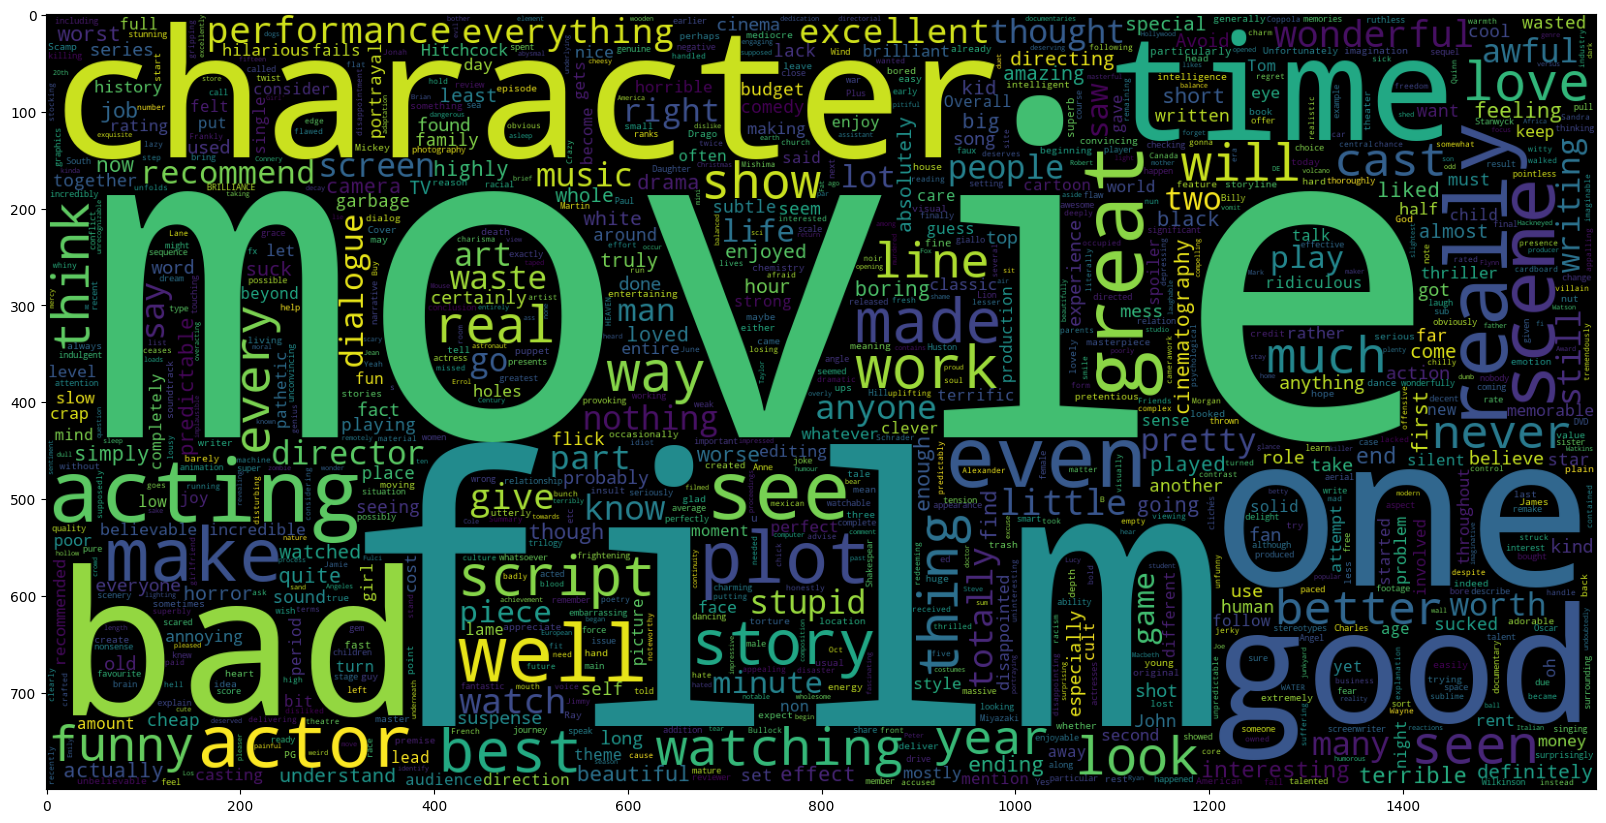

In [59]:
# Plot a cloud of words for neagtive reviews :
data_neg = data['cmd'][:800000] # selecting the positive reviews.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)